## 0. Introduction

The aim of this lab is to get familiar with **classification problems** and **logistic regression**. We will be using some code extracts that were implemented last week and build a logistic regression model.

1.   This lab is the second course-work activity **Assignment 1 Part 2: Classification**
2. Assignment 1 is split into 3 parts: Part 1 - Regression (Lab 3), and Part 2 - Classification (Lab 4) and Part 3 - Neural Networks (Lab 6). The three parts need to be submitted together by  **Monday, 11th November 2024, 10:00am**
3. All questions need to be completed and are assessed.
4. For each lab, a report answering the <font color = 'red'>**questions in red**</font> should be included along with the completed Notebook (.ipynb)
5. The report should be a separate file in **pdf format** (so **NOT** *doc, docx, notebook* etc.).
6. Make sure that **any figures or code** you comment on, are **included in the report**.
7. There are three parts of Assignment 1, therefore you should submit a zip file that contains 1 x Notebook and 1 x PDF for each part. In total: 3 x Notebooks and 3 x PDFs in the submission zip. Make sure the file is well identified with your name, student number, assignment number (for instance, Assignment 1), module code.
7. No other means of submission other than the appropriate QM+ link is acceptable at any time (so NO email attachments, etc.)
8. **PLAGIARISM** <ins>is an irreversible non-negotiable failure in the course</ins> (if in doubt of what constitutes plagiarism, ask!).


For this lab, we will be using the [iris dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset).

In [1]:
import torch
from torch import nn
from torch import optim
from torch.nn import functional as F
from sklearn import model_selection
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from IPython import display

import typing
%matplotlib inline

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

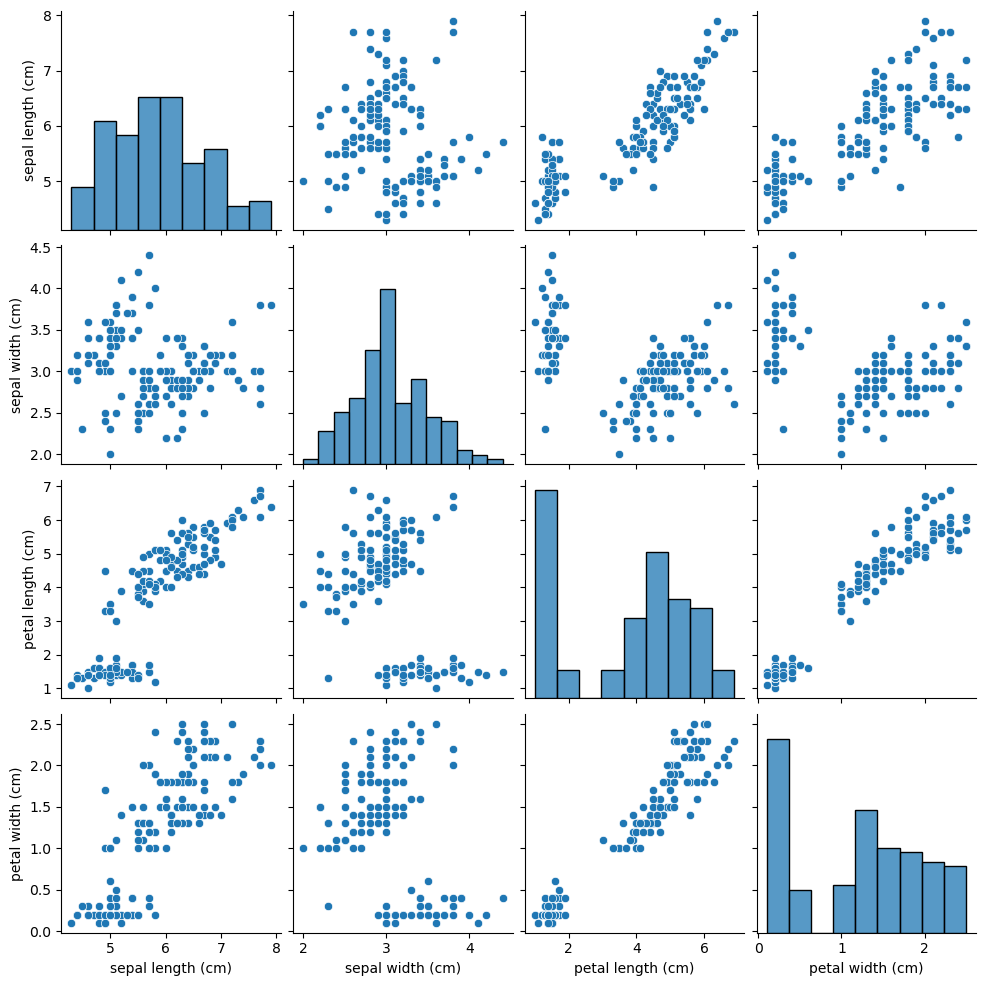

In [2]:
iris_db = datasets.load_iris(as_frame=True)
sn.pairplot(iris_db.data)

In [3]:
iris_db.data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


We will split the data into train and test sets. For consistency and to allow for meaningful comparison the same splits are maintained in the remainder of the lab.

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    iris_db.data,
    iris_db.target,
    test_size=0.2,
    random_state=42
    )
x_train = torch.from_numpy(X_train.values).float()
x_test = torch.from_numpy(X_test.values).float()

y_train = torch.from_numpy(y_train.values).int()
y_train = y_train.reshape(-1, 1)

y_test = torch.from_numpy(y_test.values).int()
y_test = y_test.reshape(-1, 1)

<font color="red">**Q1.** We again notice that the attributes are on different scales. Use the normalisation method from last lab, to standardize the scales of each attribute on both sets. Plot the normalized and raw training sets; what do you observe? [2 marks] </font>

In [5]:

# here we have to load the dataset
iris_db = datasets.load_iris()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    iris_db.data,
    iris_db.target,
    test_size=0.2,
    random_state=42
)

# Convert the training data to PyTorch tensors
x_train = torch.from_numpy(X_train).float()  # Make sure to convert to float type
x_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).int()  # Convert y_train to a tensor
y_test = torch.from_numpy(y_test).int()

# Check if `x_train` is now defined
print("x_train shape:", x_train.shape)

x_train shape: torch.Size([120, 4])


By inspecting the dataset we see that it contains 4 attributes. (`sepal length`, `sepal width`, `petal length`, `petal width`, in centimeters). For simplicity we will focus on the first two.

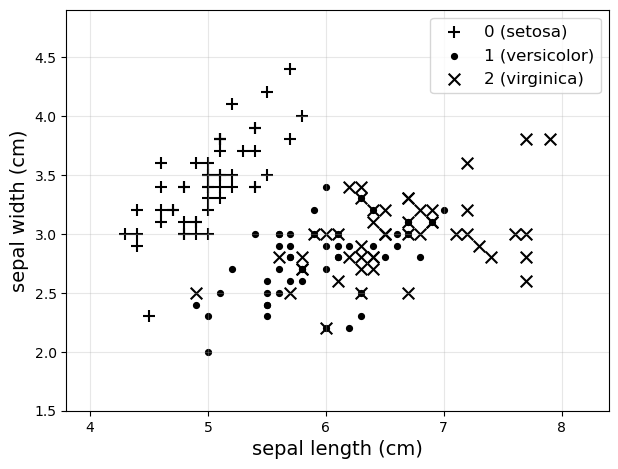

In [6]:
# we need to convert the data to a DataFrame for easier manipulation
X = pd.DataFrame(iris_db.data, columns=iris_db.feature_names)
Y = iris_db.target
marker_list = ['+', '.', 'x']

# Setting up the plot
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

# Plot each class with a unique marker
for l in [0, 1, 2]:
    ax.scatter(
        X[Y == l].iloc[:, 0],      # Feature 1 (e.g., sepal length)
        X[Y == l].iloc[:, 1],      # Feature 2 (e.g., sepal width)
        marker=marker_list[l],
        s=70,
        color='black',
        label=f'{l} ({iris_db.target_names[l]})'
    )

# we will be now Customizing and display the plot
ax.legend(fontsize=12)
ax.set_xlabel(iris_db.feature_names[0], fontsize=14)
ax.set_ylabel(iris_db.feature_names[1], fontsize=14)
ax.grid(alpha=0.3)
ax.set_xlim(X.iloc[:, 0].min() - 0.5, X.iloc[:, 0].max() + 0.5)
ax.set_ylim(X.iloc[:, 1].min() - 0.5, X.iloc[:, 1].max() + 0.5)
plt.show()

Is the data linearly separable?

As there are multiple classes, for now we will focus on class 0 (setosa). As such, we modify the `y_train` and `y_test` tensors, so that each label is 1 if the class is setosa and 0 if otherwise.

In [7]:
train_set_1 = x_train[:, :2]
test_set_1 = x_test[:, :2]

# add a feature for bias
train_set_1 = torch.cat([train_set_1, torch.ones(train_set_1.shape[0], 1)], dim=1)
test_set_1 = torch.cat([test_set_1, torch.ones(test_set_1.shape[0], 1)], dim=1)

# Create binary labels for "setosa" class (class 0)
setosa_train = (y_train == 0).int()
setosa_test = (y_test == 0).int()

# Print a sample to verify the setup
print("train_set_1:\n", train_set_1[:5])
print("setosa_train labels:\n", setosa_train[:5])

train_set_1:
 tensor([[4.6000, 3.6000, 1.0000],
        [5.7000, 4.4000, 1.0000],
        [6.7000, 3.1000, 1.0000],
        [4.8000, 3.4000, 1.0000],
        [4.4000, 3.2000, 1.0000]])
setosa_train labels:
 tensor([1, 1, 0, 1, 1], dtype=torch.int32)


## 1. Sigmoid function
With logistic regression the values we want to predict are now discrete classes, not continuous variables. In other words, logistic regression is for classification tasks. In the binary classification problem we have classes $0$ and $1$, e.g. classifying email as spam or not spam based on words used in the email.

The logistic/sigmoid function given by the formula below:

$ h_{\theta}(x) = g(\theta^{T}x) =  \frac{1}{1+ e^{-\theta^Tx}} $

**Q2.** First implement the above function in `def sigmoid()`. [2 marks]

**Q3.** Then, using the implementation of `LinearRegression` from last week as guideline, create a custom pytorch layer for `LogisticRegression` [2 marks]

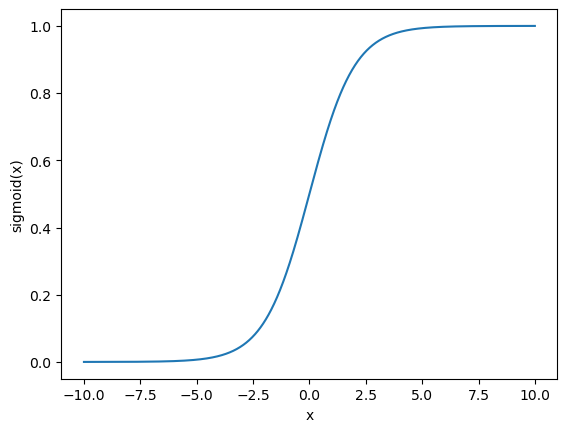

In [8]:
def sigmoid(z: torch.Tensor) -> torch.Tensor:
    return 1 / (1 + torch.exp(-z))  # Fixed by adding 'z' as the argument for torch.exp()

# Testing the sigmoid function with a range of values
x = torch.arange(1, 2000, 1) / 100.0 - 10
y = sigmoid(x)

# Plotting the sigmoid function
fig, ax1 = plt.subplots()
ax1.plot(x, y)
ax1.set_xlabel('x')  # Label for x-axis
ax1.set_ylabel('sigmoid(x)')  # Label for y-axis
plt.show()

In [9]:
import torch
import torch.nn as nn

class LogisticRegression(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.weight = nn.Parameter(torch.zeros(1, num_features), requires_grad=False)
        self.bias = nn.Parameter(torch.zeros(1), requires_grad=False)

    def forward(self, x):
        # Linear combination: w^T * x + b
        z = torch.matmul(x, self.weight.T) + self.bias
        # Sigmoid activation function
        return torch.sigmoid(z)

The cost function we will use for logistic regression is the **Cross Entropy Loss**, which is given by the form:

$J(\theta) = \frac{1}{m} \sum_{i=1}^m \left[ \left(- y^{(i)} log( h_{\theta}(x^{(i)})) - (1-y^{(i)})log(1-h_{\theta}(x^{(i)}))    \right) \right] $

Which when taking partial derivatives and putting these into the gradient descent update equation gives


$
 \theta_{j} =  \theta_{j} - \alpha \frac{1}{m}  \sum_{i=1}^m ( h_{\theta}(x^{(i)}) - y^{(i)})x^{(i)}_{j}
$

**Q4.** Implement the cost in `bce()` and update the `gradient_descent_step()` from last week to update using the partial derivative above. [4 marks]

In [10]:
def bce(y_true: torch.Tensor, y_pred: torch.Tensor) -> torch.Tensor:
  ### your code here
# Add a small epsilon value to avoid log(0)
    epsilon = 1e-10
    y_pred = torch.clamp(y_pred, min=epsilon, max=1.0 - epsilon)  # Ensure no log(0)
    
    # BCE formula
    loss = -torch.mean(y_true * torch.log(y_pred) + (1 - y_true) * torch.log(1 - y_pred))
    return loss
    return
def gradient_descent_step(model: nn.Module, X: torch.Tensor, y: torch.Tensor, y_pred: torch.Tensor, lr: float) -> None:
    weight = model.weight
    bias = model.bias
    N = X.shape[0]
    
    # Compute gradients
    grad_weight = torch.matmul((y_pred - y).T, X) / N  # Shape should match weight: [1, num_features]
    grad_bias = (y_pred - y).mean()  # Shape should match bias: [1]
    
    # Update parameters
    model.weight = nn.Parameter(weight - lr * grad_weight, requires_grad=False)
    model.bias = nn.Parameter(bias - lr * grad_bias, requires_grad=False)

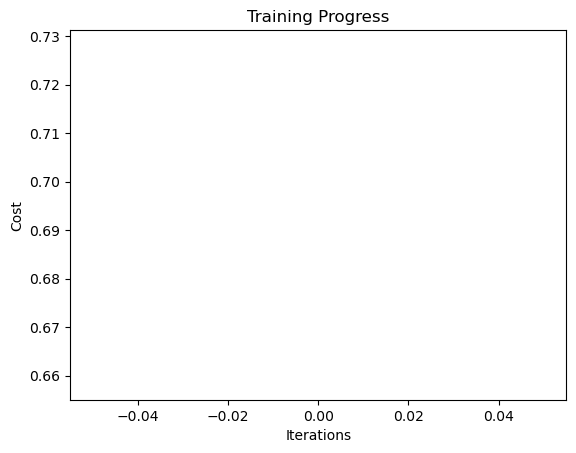

Final model weights: Parameter containing:
tensor([[ 2.9046,  1.5308,  0.5000],
        [ 2.9046,  1.5308,  0.5000],
        [-2.9046, -1.5308, -0.5000],
        [ 2.9046,  1.5308,  0.5000],
        [ 2.9046,  1.5308,  0.5000],
        [-2.9046, -1.5308, -0.5000],
        [-2.9046, -1.5308, -0.5000],
        [ 2.9046,  1.5308,  0.5000],
        [ 2.9046,  1.5308,  0.5000],
        [ 2.9046,  1.5308,  0.5000],
        [-2.9046, -1.5308, -0.5000],
        [-2.9046, -1.5308, -0.5000],
        [-2.9046, -1.5308, -0.5000],
        [ 2.9046,  1.5308,  0.5000],
        [ 2.9046,  1.5308,  0.5000],
        [-2.9046, -1.5308, -0.5000],
        [-2.9046, -1.5308, -0.5000],
        [-2.9046, -1.5308, -0.5000],
        [-2.9046, -1.5308, -0.5000],
        [-2.9046, -1.5308, -0.5000],
        [-2.9046, -1.5308, -0.5000],
        [-2.9046, -1.5308, -0.5000],
        [-2.9046, -1.5308, -0.5000],
        [ 2.9046,  1.5308,  0.5000],
        [-2.9046, -1.5308, -0.5000],
        [-2.9046, -1.5308, -0.50

In [11]:
def train(model, x, y, alpha, num_epochs=1000):
    cost_lst = []
    for it in range(num_epochs):
        # Forward pass: compute predictions and cost
        prediction = model(x)
        cost = bce(y, prediction)
        cost_lst.append(cost.item())
        
        # Gradient descent step
        gradient_descent_step(model, x, y, prediction, alpha)
        
        # Clear output and plot progress every 100 iterations
        if it % 100 == 0:
            display.clear_output(wait=True)
            plt.plot(cost_lst)
            plt.xlabel("Iterations")
            plt.ylabel("Cost")
            plt.title("Training Progress")
            plt.show()
    
    # Final weight and cost display
    print("Final model weights:", model.weight)
    print("Minimum cost achieved: {:.4f}".format(min(cost_lst)))

# Initialize model and training parameters
model = LogisticRegression(train_set_1.shape[1])
alpha = 1  # Select an appropriate learning rate
train(model, train_set_1, setosa_train, alpha)

<font color="red"> **Q5.** Draw the decision boundary on the test set using the learned parameters. Is this decision boundary separating the classes? Does this match our expectations? [2 marks]</font>

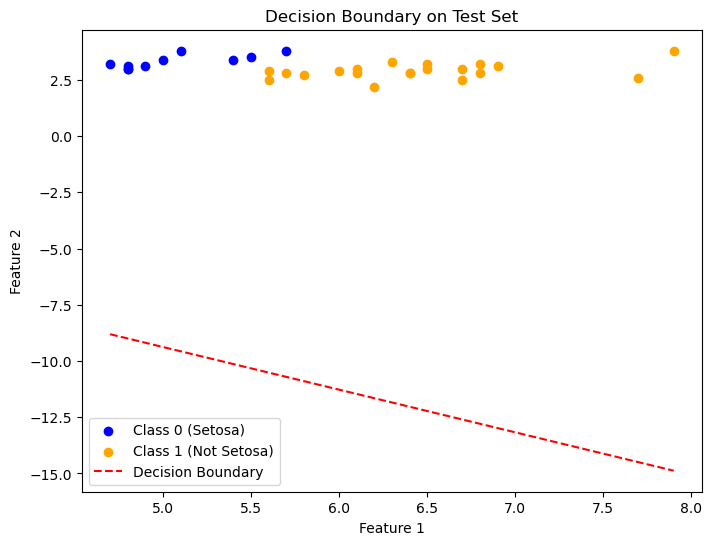

In [12]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# Assuming the model is a simple linear model
# model = nn.Linear(2, 1)  # Example model definition (2 input features, 1 output)

# Extract weights and bias from the trained model
weight = model.weight.data[0]  # Weights for the first class (if binary classification)
bias = model.bias.item() if hasattr(model, 'bias') else 0  # Bias term

# Create a grid of points over which to evaluate the decision boundary
x1_vals = torch.linspace(test_set_1[:, 0].min(), test_set_1[:, 0].max(), 100)

# Decision boundary for x2 calculated using x1 values
x2_vals = -(weight[0] * x1_vals + bias) / weight[1]

# Plot test set
plt.figure(figsize=(8, 6))

# Plot points for Setosa and Not Setosa
plt.scatter(test_set_1[:, 0][setosa_test == 1], test_set_1[:, 1][setosa_test == 1], color='blue', label='Class 0 (Setosa)')
plt.scatter(test_set_1[:, 0][setosa_test == 0], test_set_1[:, 1][setosa_test == 0], color='orange', label='Class 1 (Not Setosa)')

# Plot decision boundary
plt.plot(x1_vals, x2_vals, color='red', linestyle='--', label='Decision Boundary')

# Labels and legend
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("Decision Boundary on Test Set")
plt.show()

## 2. Multiclass
So far, we have focused on a binary classification (is this iris setosa or not), however in this section we will address the problem as a multiclass classification. We will be using a 1 vs. all approach (refer to the lecture notes for details). We will also be using all 4 attributes for the classification.

Firstly, we need to process `y_train, y_test` so that each label is a vector rather than an integer.

In [13]:
y_train = F.one_hot(y_train.reshape(-1).long(), num_classes=3)
y_test = F.one_hot(y_test.reshape(-1).long(), num_classes=3)
print(y_test.shape)

torch.Size([30, 3])


In this section we will use the built in pytorch methods.


In [14]:
alpha = 0.1
setosa_model = nn.Sequential(nn.Linear(x_train.shape[1], 1, bias=False), nn.Sigmoid())
setosa_labels = y_train[:, 0].reshape(-1, 1).float()
setosa_testy = y_test[:, 0].reshape(-1, 1).float()
optimiser = optim.SGD(setosa_model.parameters(), alpha)

def train(model, x, y, test_x, test_y, optimiser, alpha):
  train_lst = list()
  test_lst = list()
  for i in range(1000):
    model.train()
    optimiser.zero_grad()
    pred = model(x)
    cost = F.binary_cross_entropy(pred, y, reduction='mean')
    cost.backward()
    train_lst.append(cost.item())
    optimiser.step()
    model.eval()
    with torch.no_grad():
      test_pred = model(test_x)
      test_cost = F.binary_cross_entropy(test_pred, test_y, reduction='mean')
      test_lst.append(test_cost)
  fig, axs = plt.subplots(2)
  axs[0].plot(list(range(i+1)), train_lst)
  axs[1].plot(list(range(i+1)), test_lst)
  plt.show()
  print('Minimum train cost: {}'.format(min(train_lst)))
  print('Minimum test cost: {}'.format(min(test_lst)))


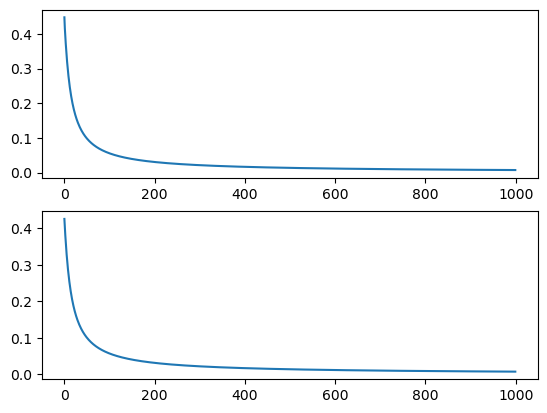

Minimum train cost: 0.007406781893223524
Minimum test cost: 0.007373639848083258


In [15]:
train(setosa_model, x_train, setosa_labels, x_test, setosa_testy, optimiser, alpha)

How does the cost of the 4 attribute model compare to the previous one?

**Q6** Now train classifiers for the other two classes.[1 mark]

In [16]:

# Assuming your train function is defined as:
def train(model, x_train, class_labels, x_test, class_test_labels, optimiser):
    # Implement your training logic here
    pass

# Train model for each class using OvA approach
for class_idx in range(3):
    print(f"\nTraining model for Class {class_idx} (One-vs-All)...")
    
    # Create a model for this specific class
    class_model = nn.Sequential(
        nn.Linear(x_train.shape[1], 1, bias=False),
        nn.Sigmoid()
    )
    
    # Set labels for current class: 1 for the target class, 0 otherwise
    class_labels = y_train[:, class_idx].reshape(-1, 1).float()
    class_test_labels = y_test[:, class_idx].reshape(-1, 1).float()
    
    # Define optimizer
    optimiser = optim.SGD(class_model.parameters(), lr=alpha)  # Make sure alpha is defined
    
    # Train the model
    train(class_model, x_train, class_labels, x_test, class_test_labels, optimiser)


Training model for Class 0 (One-vs-All)...

Training model for Class 1 (One-vs-All)...

Training model for Class 2 (One-vs-All)...


<font color="red"> **Q7.** Using the 3 classifiers, predict the classes of the samples in the test set and show the predictions in a table. Do you observe anything interesting? [4 marks] </font>

In [17]:


# Define the train function
def train(model, x_train, class_labels, x_test, class_test_labels, optimiser, alpha, epochs=100):
    # Loss function
    criterion = nn.BCELoss()

    # Training loop
    for epoch in range(epochs):
        # Forward pass
        output = model(x_train)
        loss = criterion(output, class_labels)

        # Zero the gradients, perform the backward pass, and update the weights
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()

        # Print loss every 10 epochs
        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

    # Test the model after training
    with torch.no_grad():
        test_output = model(x_test)
        predicted = (test_output >= 0.5).float()  # Convert probabilities to 0 or 1
        accuracy = (predicted == class_test_labels).float().mean()
        print(f"Test Accuracy for Class: {accuracy.item():.4f}\n")

# Assuming that x_train, y_train, x_test, y_test are already defined as torch tensors
# For example, if y_train is one-hot encoded, we need to use [:, class_idx] to get the binary class labels for each class

alpha = 0.01  # Learning rate

# Create a list to hold models for each class
models = []
for class_idx in range(3):  # Assuming there are 3 classes
    print(f"\nTraining model for Class {class_idx} (One-vs-All)...")
    
    # Define and train the model for each class
    class_model = nn.Sequential(
        nn.Linear(x_train.shape[1], 1, bias=False),
        nn.Sigmoid()
    )
    
    # Set labels for current class: 1 for the target class, 0 otherwise
    class_labels = y_train[:, class_idx].reshape(-1, 1).float()
    class_test_labels = y_test[:, class_idx].reshape(-1, 1).float()
    
    # Define optimizer
    optimiser = optim.SGD(class_model.parameters(), lr=alpha)  # Using SGD optimizer
    
    # Train the model for this class
    train(class_model, x_train, class_labels, x_test, class_test_labels, optimiser, alpha)  # Passing alpha
    
    # Append the trained model
    models.append(class_model)

# Predict classes for test samples using each model
test_preds = []
with torch.no_grad():
    for class_idx, model in enumerate(models):
        class_probs = model(x_test).numpy()  # Get probability predictions for each class
        test_preds.append(class_probs)

# Stack predictions horizontally to get a matrix of predictions (samples x classes)
test_preds = np.hstack(test_preds)

# Determine the predicted class by selecting the class with the highest probability for each sample
predicted_classes = np.argmax(test_preds, axis=1)

# Compare with actual classes in y_test for a quick check
actual_classes = y_test.argmax(axis=1).numpy()

# Create a DataFrame for better visualization
results_df = pd.DataFrame({
    "Sample": range(len(y_test)),
    "Predicted Class": predicted_classes,
    "Actual Class": actual_classes
})

print(results_df)

# Analyze and interpret
accuracy = (predicted_classes == actual_classes).mean()
print(f"Model Accuracy on Test Set: {accuracy * 100:.2f}%")


Training model for Class 0 (One-vs-All)...
Epoch [10/100], Loss: 0.5516
Epoch [20/100], Loss: 0.4675
Epoch [30/100], Loss: 0.4375
Epoch [40/100], Loss: 0.4131
Epoch [50/100], Loss: 0.3911
Epoch [60/100], Loss: 0.3709
Epoch [70/100], Loss: 0.3524
Epoch [80/100], Loss: 0.3355
Epoch [90/100], Loss: 0.3199
Epoch [100/100], Loss: 0.3055
Test Accuracy for Class: 1.0000


Training model for Class 1 (One-vs-All)...
Epoch [10/100], Loss: 0.7052
Epoch [20/100], Loss: 0.6124
Epoch [30/100], Loss: 0.6073
Epoch [40/100], Loss: 0.6060
Epoch [50/100], Loss: 0.6050
Epoch [60/100], Loss: 0.6040
Epoch [70/100], Loss: 0.6031
Epoch [80/100], Loss: 0.6023
Epoch [90/100], Loss: 0.6015
Epoch [100/100], Loss: 0.6007
Test Accuracy for Class: 0.7000


Training model for Class 2 (One-vs-All)...
Epoch [10/100], Loss: 0.6195
Epoch [20/100], Loss: 0.5987
Epoch [30/100], Loss: 0.5810
Epoch [40/100], Loss: 0.5649
Epoch [50/100], Loss: 0.5502
Epoch [60/100], Loss: 0.5367
Epoch [70/100], Loss: 0.5244
Epoch [80/100], L

<font color="red"> **Q8.** Calculate the accuracy of the classifier on the test set, by comparing the predicted values against the ground truth. Use a softmax for the classifier outputs. [1 mark] </font>

In [21]:


# Define the train function
def train(model, x_train, class_labels, x_test, class_test_labels, optimiser, alpha, epochs=100):
    # Loss function
    criterion = nn.BCELoss()

    # Training loop
    for epoch in range(epochs):
        # Forward pass
        output = model(x_train)
        loss = criterion(output, class_labels)

        # Zero the gradients, perform the backward pass, and update the weights
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()

        # Print loss every 10 epochs
        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

    # Test the model after training
    with torch.no_grad():
        test_output = model(x_test)
        predicted = (test_output >= 0.5).float()  # Convert probabilities to 0 or 1
        accuracy = (predicted == class_test_labels).float().mean()
        print(f"Test Accuracy for Class: {accuracy.item():.4f}\n")

# Assuming that x_train, y_train, x_test, y_test are already defined as torch tensors
# For example, if y_train is one-hot encoded, we need to use [:, class_idx] to get the binary class labels for each class

alpha = 0.01  # Learning rate

# Create a list to hold models for each class
models = []
for class_idx in range(3):  # Assuming there are 3 classes
    print(f"\nTraining model for Class {class_idx} (One-vs-All)...")
    
    # Define and train the model for each class
    class_model = nn.Sequential(
        nn.Linear(x_train.shape[1], 1, bias=False),
        nn.Sigmoid()
    )
    
    # Set labels for current class: 1 for the target class, 0 otherwise
    class_labels = y_train[:, class_idx].reshape(-1, 1).float()
    class_test_labels = y_test[:, class_idx].reshape(-1, 1).float()
    
    # Define optimizer
    optimiser = optim.SGD(class_model.parameters(), lr=alpha)  # Using SGD optimizer
    
    # Train the model for this class and pass alpha
    train(class_model, x_train, class_labels, x_test, class_test_labels, optimiser, alpha)  # Pass alpha explicitly
    
    # Append the trained model
    models.append(class_model)

# Predict classes for test samples using each model
test_preds = []
with torch.no_grad():
    for class_idx, model in enumerate(models):
        class_probs = model(x_test).numpy()  # Get probability predictions for each class
        test_preds.append(class_probs)

# Stack predictions horizontally to get a matrix of predictions (samples x classes)
test_preds = np.hstack(test_preds)

# Convert test_preds to a torch tensor
test_preds_tensor = torch.tensor(test_preds, dtype=torch.float32)

# Apply softmax to the predictions (along the columns, axis 1)
test_preds_softmax = F.softmax(test_preds_tensor, dim=1).numpy()

# Determine the predicted class by selecting the class with the highest probability for each sample
predicted_classes = np.argmax(test_preds_softmax, axis=1)

# Compare with actual classes in y_test for a quick check
actual_classes = y_test.argmax(axis=1).numpy()

# Calculate the accuracy
accuracy = (predicted_classes == actual_classes).mean()

print(f"Model Accuracy on Test Set: {accuracy * 100:.2f}%")


Training model for Class 0 (One-vs-All)...
Epoch [10/100], Loss: 0.3553
Epoch [20/100], Loss: 0.3142
Epoch [30/100], Loss: 0.2977
Epoch [40/100], Loss: 0.2849
Epoch [50/100], Loss: 0.2733
Epoch [60/100], Loss: 0.2625
Epoch [70/100], Loss: 0.2526
Epoch [80/100], Loss: 0.2433
Epoch [90/100], Loss: 0.2346
Epoch [100/100], Loss: 0.2265
Test Accuracy for Class: 1.0000


Training model for Class 1 (One-vs-All)...
Epoch [10/100], Loss: 0.7152
Epoch [20/100], Loss: 0.6930
Epoch [30/100], Loss: 0.6816
Epoch [40/100], Loss: 0.6717
Epoch [50/100], Loss: 0.6628
Epoch [60/100], Loss: 0.6547
Epoch [70/100], Loss: 0.6474
Epoch [80/100], Loss: 0.6407
Epoch [90/100], Loss: 0.6347
Epoch [100/100], Loss: 0.6292
Test Accuracy for Class: 0.7000


Training model for Class 2 (One-vs-All)...
Epoch [10/100], Loss: 0.5229
Epoch [20/100], Loss: 0.5115
Epoch [30/100], Loss: 0.5018
Epoch [40/100], Loss: 0.4928
Epoch [50/100], Loss: 0.4844
Epoch [60/100], Loss: 0.4766
Epoch [70/100], Loss: 0.4694
Epoch [80/100], L

## 3. The XOR problem

<font color="red"> **Q9.** Looking at the datapoints below, can we draw a decision boundary using Logistic Regression? Why? What are the specific issues or logistic regression with regards to XOR? [2 marks] </font>

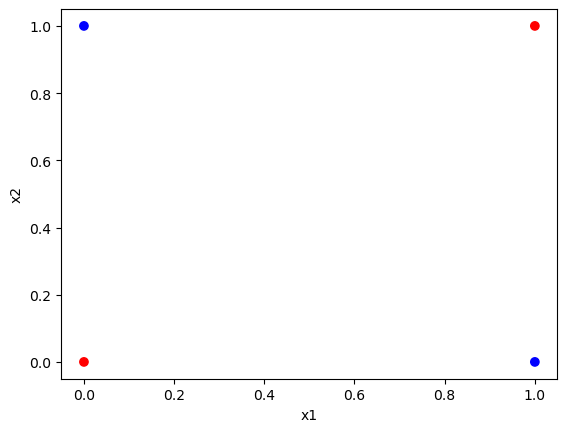

In [19]:
x1 = [0, 0, 1, 1]
x2 = [0, 1, 0, 1]
y = [0, 1, 1, 0]

c_map = ['r', 'b', 'b', 'r']
plt.scatter(x1, x2, c=c_map)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [23]:
# """"When plotted, the points form an “X” pattern, which shows that no straight line can separate the two classes. This is the key issue with using logistic regression on this problem.

# Issues with Logistic Regression for XOR:

# 	1.	Linear Separability: Logistic regression is a linear classifier, meaning it can only find a linear decision boundary (a straight line) between the two classes. In the case of XOR, the data points for class 0 and class 1 cannot be separated by a straight line.
# 	2.	Inability to Model Non-Linear Relationships: The XOR problem requires a non-linear decision boundary (like a curve) to properly separate the classes. Logistic regression, being linear, cannot capture this non-linearity. It attempts to create a linear boundary, which would be ineffective for this dataset.
# 	3.	Need for Feature Transformation: To solve the XOR problem using logistic regression, we would need to transform the input features. For example, adding new features (like x_1 \times x_2) or using kernel methods can map the data to a higher-dimensional space where a linear decision boundary might be effective.

# Conclusion:

# Logistic regression cannot draw a decision bwoundary that successfully separates the XOR problem because it is unable to model non-linear decision boundaries. For XOR, we would need to either use a non-linear model or apply feature transformations to make the data linearly separable.""""

In [ ]:
#Acknowledgement
#Here, I have used google youtube, chatgpt for the reference and structure enhancement for effective way